# ***Multiple Regression from scratch***

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="multiple_Regression_1.jpg" alt="Image 1" width="400">
  <img src="multiple_Regression_2.jpg" alt="Image 2" width="400">
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data handling**

In [ ]:
dataset  = pd.read_csv("../DataSets/advertising.csv")
# TV,Radio,Newspaper,Sales
target = dataset["Sales"].values.reshape(-1,1)
features = dataset[["TV","Radio","Newspaper"]]
features.insert(0,"bias",1)
features = features.values


# **Data Spliting** 

In [5]:
y_train = target[:150]
x_train = features[:150][:]
y_test = target[150:]
x_test = features[150:][:]

# **Training**

# *Formulated approach without any epocs*

In [6]:
b_normal = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

In [7]:
y_pred_normal = x_test @ b_normal
mse_normal = np.mean((y_pred_normal - y_test)**2)
print("Normal Equation Weights:\n", b_normal)
print("Normal Equation MSE:", mse_normal)

Normal Equation Weights:
 [[4.61574274e+00]
 [5.48666187e-02]
 [1.00128902e-01]
 [4.45027621e-03]]
Normal Equation MSE: 3.5148408095370343


# *Iterative approach with epocs*

In [8]:
delta = 0.00001
epoc = 1000
b = np.zeros((x_train.shape[1],1))
x = []
y = []
for epocs in range(epoc):
    y_pred = x_train @ b
    gradient = (2/150) * (x_train.T @ (y_pred - y_train))
    b -= delta * gradient
    acc = np.mean(y_train - (x_train @ b))
    x.append(epocs)
    y.append(acc)


In [9]:
y_pred = x_test @ b
acc = np.mean(np.square(y_test - y_pred))
acc

np.float64(6.882585500487846)

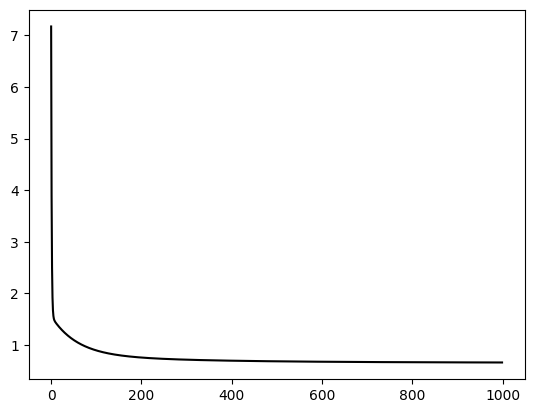

In [11]:
x = np.array(x)
y = np.array(y)
plt.plot(x,y,color="black")
plt.show()